**Main paper:**

*Efficient Gillespie algorithms for spreading phenomena in large and heterogeneous higher-order networks*, by Hugo P. Maia, Wesley Cota, Yamir Moreno, and Silvio C. Ferreira (2025) <https://doi.org/10.48550/arXiv.2509.20174>

**Repository:**

https://github.com/gisc-ufv/hyperSIS

**More examples and documentation on network formats:**

https://github.com/gisc-ufv/hyperSIS/blob/main/examples.ipynb

# Installing the package

In [1]:
!pip install hyperSIS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.6/343.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.0 MB/s eta 0:00:00


# Running the simulations

In [2]:
# main dynamics
import hyperSIS as hs

# visualization
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import seaborn as sns

# extra
import numpy as np


Please cite the following paper if you use hyperSIS in your research:

    Hugo P. Maia, Wesley Cota, Yamir Moreno, and Silvio C. Ferreira.
    Efficient Gillespie algorithms for spreading phenomena in large and heterogeneous higher-order networks.
    arXiv:2509.20174, 2025. DOI:10.48550/arXiv.2509.20174. https://arxiv.org/abs/2509.20174



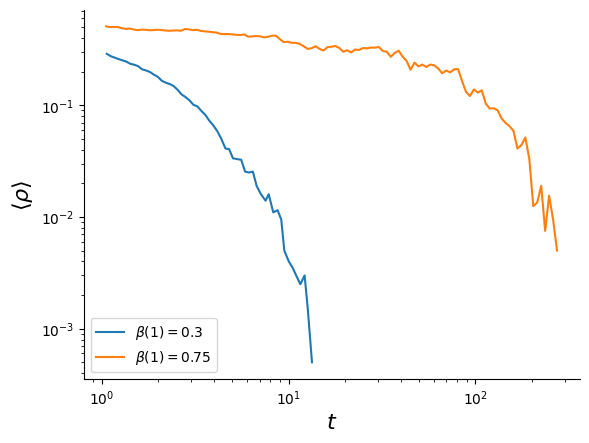

In [3]:
# Using default network

args = hs.SimulationArgs(
    tmax = 1000,
    initial_condition = ('fraction', 0.5),
    n_samples = 20,
    par_b = 0.8,
    par_theta = 0.7,
    time_scale='powerlaw'
)

# Run the simulation for a given value of beta1
fig, ax = plt.subplots()

for beta1 in [0.3, 0.75]:
    data = hs.run_simulation(beta1 = beta1, args=args)

    # Get resultspackage
    times = data.temporal.t
    rho_avg = data.temporal.rho_avg

    # Plot it
    ax.plot(times, rho_avg, label=fr'$\beta(1) = {beta1}$')

    ax.set_xlabel(r'$t$', fontsize=16)
    ax.set_ylabel(r'$\langle \rho \rangle$', fontsize=16)
    ax.legend()
    ax.set_xscale('log')
    ax.set_yscale('log')
    sns.despine()

    # Show dynamically
    clear_output(wait=True)
    display(fig)
clear_output(wait=True)

Example with a power-law network:

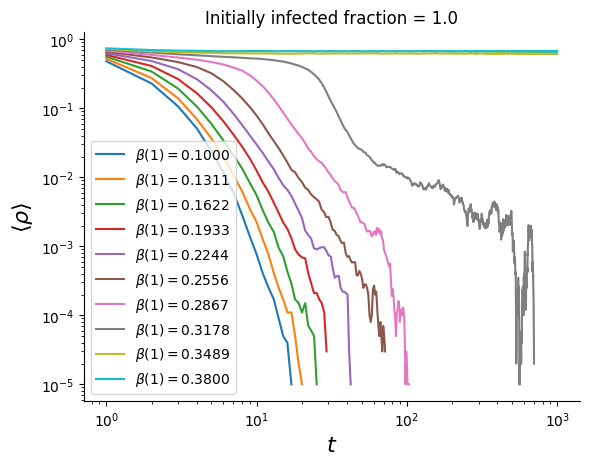

In [ ]:
# Whole network initially infected

args = hs.SimulationArgs(
    network = ("PL", 3.0, 10000),
    tmax = 1000,
    initial_condition = ('fraction', 1.0),
    n_samples = 10,
    par_b = 0.8,
    par_theta = 0.7
)

# Run the simulation for a given value of beta1
fig, ax = plt.subplots()

for beta1 in np.linspace(0.1, 0.38, 10):
    data = hs.run_simulation(beta1 = beta1, args=args)

    # Get results
    times = data.temporal.t
    rho_avg = data.temporal.rho_avg

    # Plot it
    ax.plot(times, rho_avg, label=fr'$\beta(1) = {beta1:.4f}$')

    ax.set_xlabel(r'$t$', fontsize=16)
    ax.set_ylabel(r'$\langle \rho \rangle$', fontsize=16)
    ax.legend()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title('Initially infected fraction = 1.0')
    sns.despine()

    # Show dynamically
    clear_output(wait=True)
    display(fig)
clear_output(wait=True)

# QS Simulation

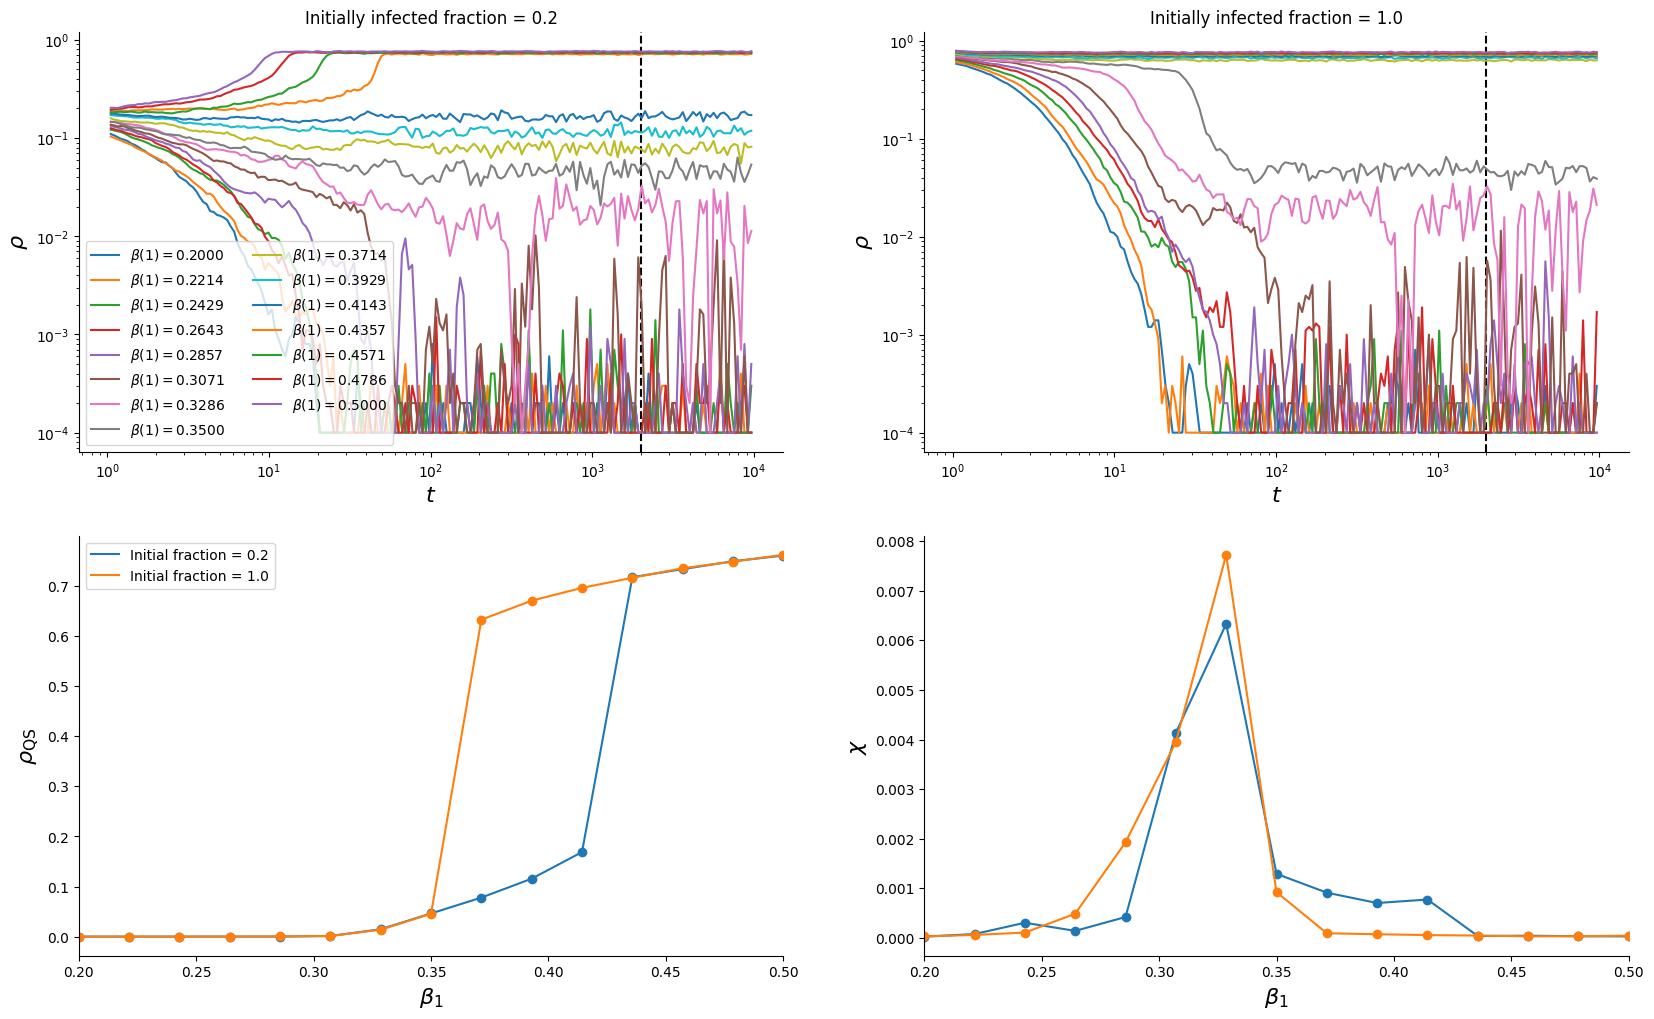

In [ ]:
# Whole network initially infected

t_rlx = 2000
t_med = 8000

args = hs.SimulationArgs(
    network = ("PL", 3.0, 10000),
    tmax = t_rlx + t_med,
    n_samples = 1,
    par_b = 0.8,
    par_theta = 0.7,
    use_qs = True,
    time_scale = 'powerlaw',
    algorithm = 'NB_OGA'
)

min_beta = 0.20
max_beta = 0.50

beta_values = np.linspace(min_beta, max_beta, 15)

fraction_values = [0.2, 1.0]

# get list of colors of tab20
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Run the simulation for a given value of beta1runs
fig, axs_ori = plt.subplots(ncols=2, nrows=2, figsize=(20,12))
axs = axs_ori.flatten()
sns.despine()

axs[0].axvline(x=t_rlx, color='k', linestyle='--')
axs[1].axvline(x=t_rlx, color='k', linestyle='--')

axs[2].set_xlabel(r'$\beta_1$', fontsize=16)
axs[3].set_xlabel(r'$\beta_1$', fontsize=16)
axs[2].set_ylabel(r'$\rho_\mathrm{QS}$', fontsize=16)
axs[3].set_ylabel(r'$\chi$', fontsize=16)
axs[2].set_xlim(0.2, 0.5)
axs[3].set_xlim(0.2, 0.5)

for ax_i, fraction in enumerate(fraction_values):
    rho_qs = []
    sus_qs = []
    for beta1 in beta_values:
        args.initial_condition = ('fraction', fraction)
        data = hs.run_simulation(beta1 = beta1, args=args)

        # Get results, performing average from t_rlx to t_rlx + t_med
        times = data.temporal.t
        rho_avg = data.temporal.rho_avg
        # use where t > t_rlx to perform average and evaluate (<rho^2>-<rho>^2)/<rho> (https://journals.aps.org/pre/abstract/10.1103/PhysRevE.86.041125)
        # note that data.temporal.t is not uniform, we must use np.where or something related
        qs_avg = np.mean(rho_avg[np.where(times > t_rlx)])
        qs_avg2 = np.mean(rho_avg[np.where(times > t_rlx)]**2)
        qs_sus = (qs_avg2 - qs_avg**2)/(qs_avg)
        rho_qs.append(qs_avg)
        sus_qs.append(qs_sus)

        # Plot temporal
        ax = axs[0+ax_i]
        ax.plot(times, rho_avg, label=fr'$\beta(1) = {beta1:.4f}$')
        ax.set_xlabel(r'$t$', fontsize=16)
        ax.set_ylabel(r'$\rho$', fontsize=16)
        if ax_i == 0:
            ax.legend(loc='lower left', fontsize=10, ncol=2)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title(f'Initially infected fraction = {fraction}')

        # Plot rho and chi
        axs[2].plot(beta1, qs_avg, 'o', color=colors[ax_i])
        axs[3].plot(beta1, qs_sus, 'o', color=colors[ax_i])

        # Show dynamically
        clear_output(wait=True)
        display(fig)

    # Plot rho
    ax = axs[2]
    ax.plot(beta_values, rho_qs, '-', label=f'Initial fraction = {fraction}', color=colors[ax_i])
    ax.legend(fontsize=10)

    # Plot susceptibility \chi
    ax = axs[3]
    ax.plot(beta_values, sus_qs, '-', label=f'Initial fraction = {fraction}', color=colors[ax_i])

    # Show dynamically
    clear_output(wait=True)
    display(fig)

clear_output(wait=True)

## Parallel code

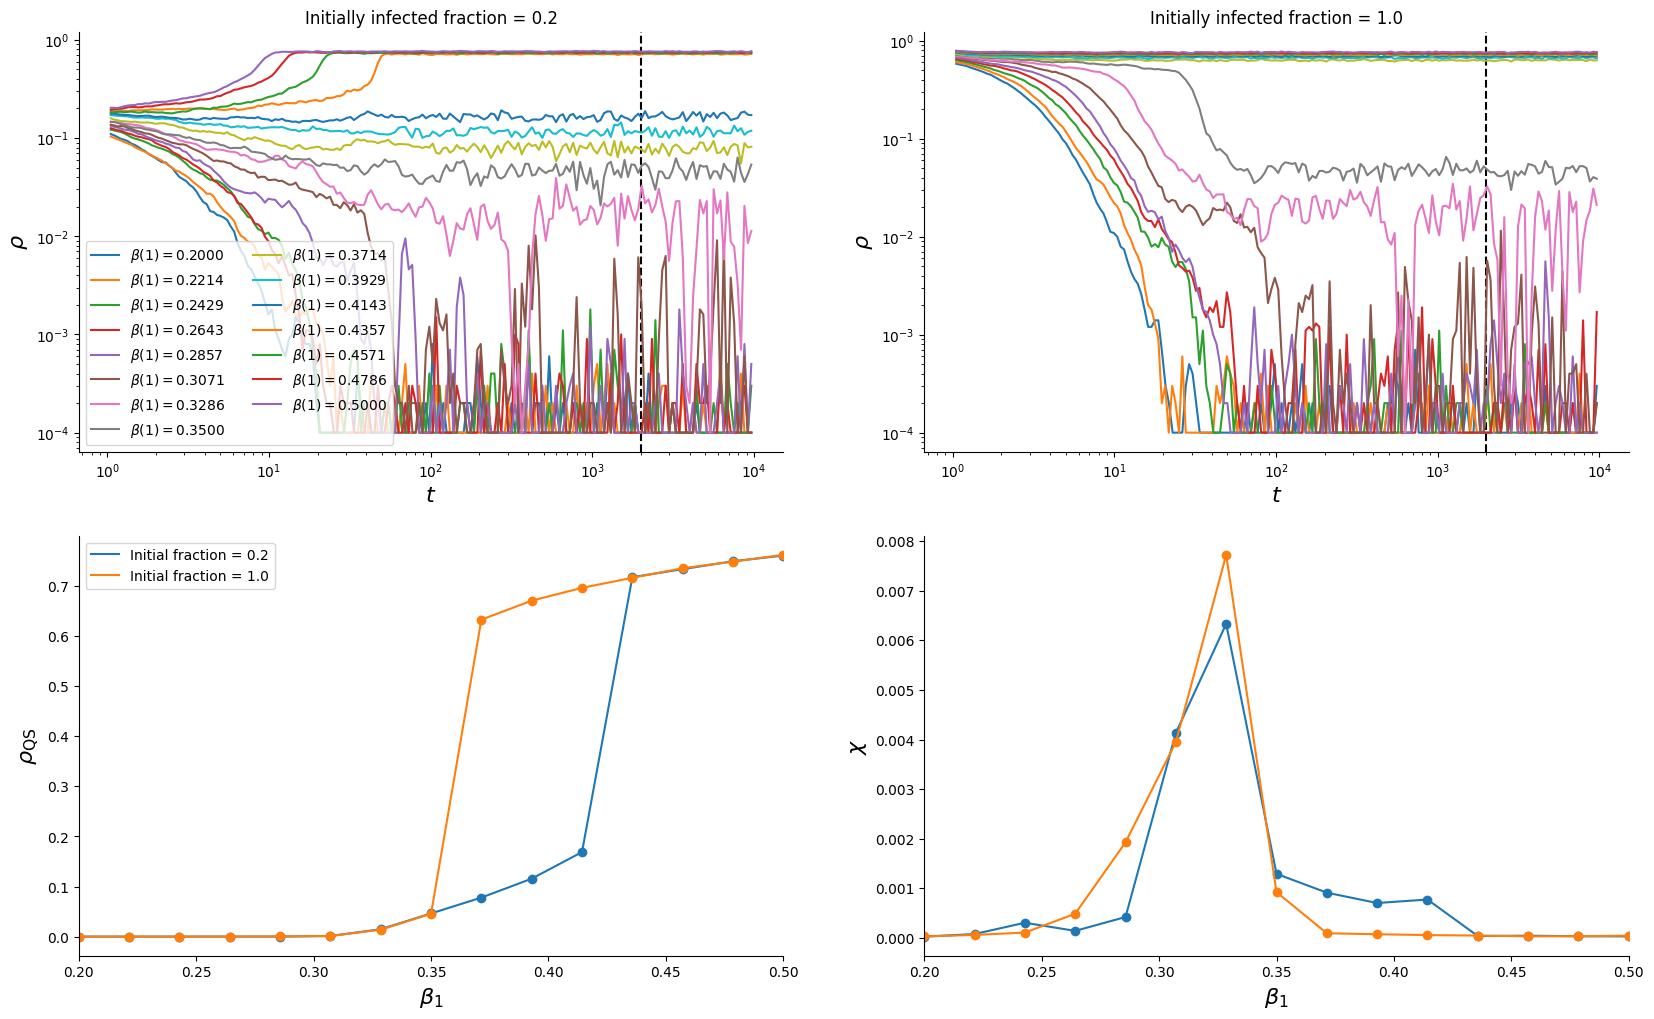

In [ ]:
from joblib import Parallel, delayed

fig, axs_ori = plt.subplots(ncols=2, nrows=2, figsize=(20, 12))
axs = axs_ori.flatten()
sns.despine()

axs[0].axvline(x=t_rlx, color='k', linestyle='--')
axs[1].axvline(x=t_rlx, color='k', linestyle='--')
axs[2].set_xlabel(r'$\beta_1$', fontsize=16)
axs[3].set_xlabel(r'$\beta_1$', fontsize=16)
axs[2].set_ylabel(r'$\rho_\mathrm{QS}$', fontsize=16)
axs[3].set_ylabel(r'$\chi$', fontsize=16)
axs[2].set_xlim(min_beta, max_beta)
axs[3].set_xlim(min_beta, max_beta)

def run_one(beta1, fraction, args):
    # precisa copiar args se ele for mutável internamente
    args.initial_condition = ('fraction', fraction)
    data = hs.run_simulation(beta1=beta1, args=args)

    times = data.temporal.t
    rho_avg = data.temporal.rho_avg

    mask = times > t_rlx
    qs_avg = np.mean(rho_avg[mask])
    qs_avg2 = np.mean(rho_avg[mask] ** 2)
    qs_sus = (qs_avg2 - qs_avg**2) / qs_avg

    return beta1, times, rho_avg, qs_avg, qs_sus

for ax_i, fraction in enumerate(fraction_values):
    results = Parallel(n_jobs=-1)(
        delayed(run_one)(beta1, fraction, args) for beta1 in beta_values
    )

    results.sort(key=lambda x: x[0])

    rho_qs = []
    sus_qs = []

    for beta1, times, rho_avg, qs_avg, qs_sus in results:
        rho_qs.append(qs_avg)
        sus_qs.append(qs_sus)

        # Plot temporal
        ax = axs[0 + ax_i]
        ax.plot(times, rho_avg, label=fr'$\beta(1) = {beta1:.4f}$')
        ax.set_xlabel(r'$t$', fontsize=16)
        ax.set_ylabel(r'$\rho$', fontsize=16)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title(f'Initially infected fraction = {fraction}')
        if ax_i == 0:
            ax.legend(loc='lower left', fontsize=10, ncol=2)

        axs[2].plot(beta1, qs_avg, 'o', color=colors[ax_i])
        axs[3].plot(beta1, qs_sus, 'o', color=colors[ax_i])

    axs[2].plot(beta_values, rho_qs, '-', label=f'Initial fraction = {fraction}', color=colors[ax_i])
    axs[2].legend(fontsize=10)

    axs[3].plot(beta_values, sus_qs, '-', label=f'Initial fraction = {fraction}', color=colors[ax_i])

    clear_output(wait=True)
    display(fig)

clear_output(wait=True)

# Using XGI objects

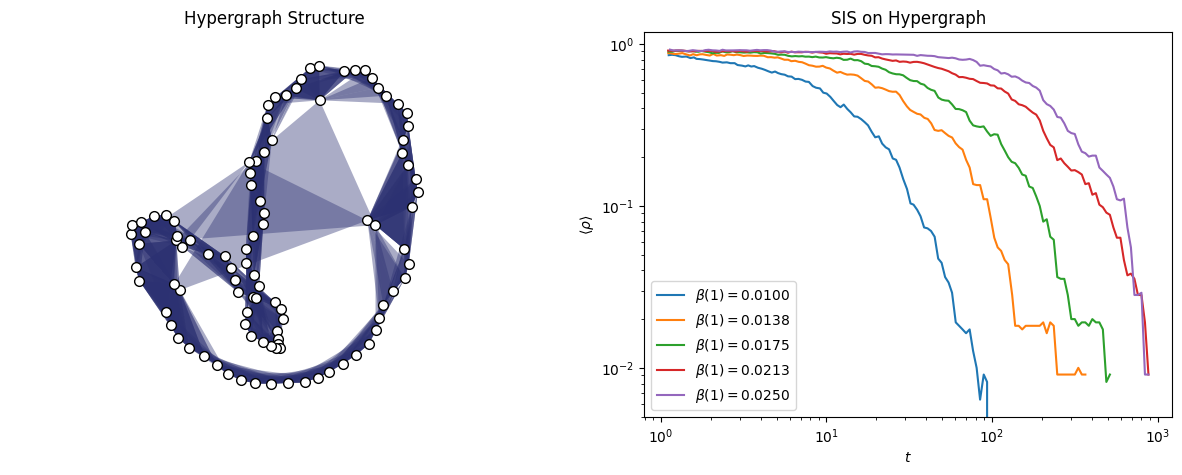

In [4]:
import xgi

# Create a random hypergraph
H = xgi.generators.random.watts_strogatz_hypergraph(100, 4, 6, 2, 0.01)

# Visualize the hypergraph
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

xgi.draw(H, with_edge_labels=True, ax=axs[0])
axs[0].set_title("Hypergraph Structure")

args = hs.SimulationArgs(
    network = ("xgi", H),
    tmax = 1000,
    initial_condition = ('fraction', 1.0),
    n_samples = 100,
    par_b = 0.8,
    par_theta = 0.7,
    sampler = 'btree',
    algorithm = 'NB_OGA',
    time_scale = 'powerlaw'
)

# Run the simulation for a given value of beta1

for beta1 in np.linspace(0.01, 0.025, 5):
    data = hs.run_simulation(beta1 = beta1, args=args)

    # Get results
    times = data.temporal.t
    rho_avg = data.temporal.rho_avg

    # Plot it
    axs[1].plot(times, rho_avg, label=fr'$\beta(1) = {beta1:.4f}$')

    axs[1].set_xlabel(r'$t$')
    axs[1].set_ylabel(r'$\langle \rho \rangle$')
    axs[1].legend()
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_title('SIS on Hypergraph')
    clear_output(wait=True)
    display(fig)

clear_output(wait=True)

# Using NetworkX objects


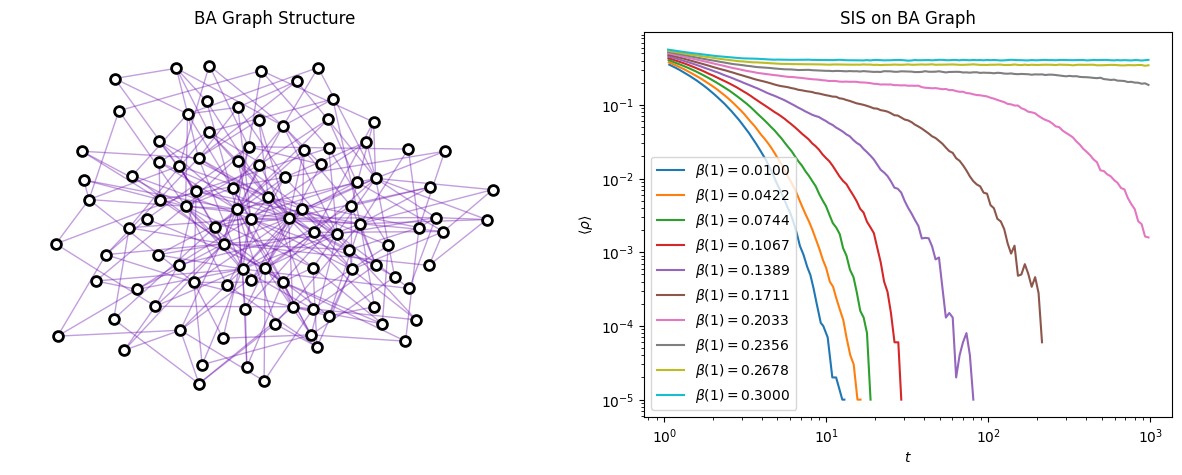

In [5]:
import networkx as nx

# Create a random BA graph
G = nx.barabasi_albert_graph(100, 3)

# Visualize the hypergraph
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

nx.draw(G, ax=axs[0], node_size=50, node_color='white', edgecolors='black', edge_color=(106/255, 13/255, 173/255, 0.4), linewidths=2.0)
axs[0].set_title("BA Graph Structure")

args = hs.SimulationArgs(
    network = ("networkx", G),
    tmax = 1000,
    initial_condition = ('fraction', 1.0),
    n_samples = 1000,
    #par_b = 0.8, # does not have effect
    #par_theta = 0.7, # does not have effect
    sampler = 'btree',
    algorithm = 'NB_OGA',
    time_scale = 'powerlaw'
)

# Run the simulation for a given value of beta1

for beta1 in np.linspace(0.01, 0.3, 10):
    data = hs.run_simulation(beta1 = beta1, args=args)

    # Get results
    times = data.temporal.t
    rho_avg = data.temporal.rho_avg

    # Plot it
    axs[1].plot(times, rho_avg, label=fr'$\beta(1) = {beta1:.4f}$')

    axs[1].set_xlabel(r'$t$')
    axs[1].set_ylabel(r'$\langle \rho \rangle$')
    axs[1].legend()
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_title('SIS on BA Graph')

    clear_output(wait=True)
    display(fig)

clear_output(wait=True)

**Main paper:**

*Efficient Gillespie algorithms for spreading phenomena in large and heterogeneous higher-order networks*, by Hugo P. Maia, Wesley Cota, Yamir Moreno, and Silvio C. Ferreira (2025) <https://doi.org/10.48550/arXiv.2509.20174>

**Repository:**

https://github.com/gisc-ufv/hyperSIS

**More examples and documentation on network formats:**

https://github.com/gisc-ufv/hyperSIS/blob/main/examples.ipynb